待办:
- [ ] 设置主题为暗色主题/自己做一个不要有亮色的`colormap`/给`stemline`加上极细的轮廓线
- [ ] 转换坐标轴位置/自己hack一个坐标轴
- [ ] 如果分类少，可以在涂上添加标注

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/COMPOSED.csv")
# 数据标准化
df.set_index("Country",inplace=True)
df.apply(lambda col: list(map(lambda x: (x- col.mean())/col.std(),col)), axis=0)
df.reset_index(inplace=True)
final_score = df["complex_HH"] * 0.35 + df["complex_PRIV"] * 0.65

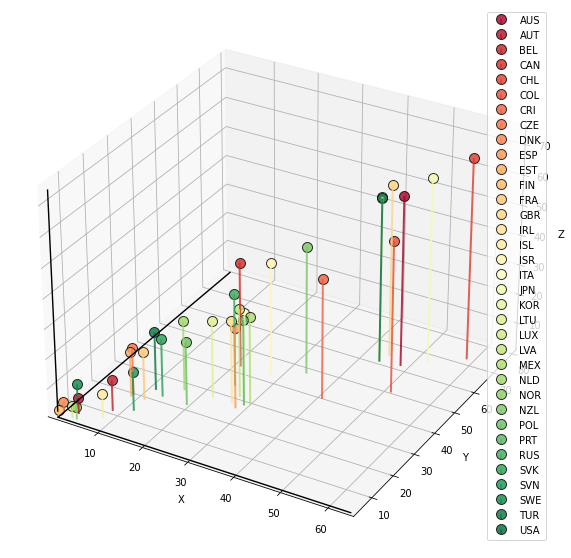

In [14]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")

cmap = plt.get_cmap("RdYlGn")
colors = [cmap(i) for i in np.linspace(0,1,len(df.index))]
X = df["complex_HH"]
Y = df["complex_PRIV"]
Z = final_score
labels = df["Country"]

for i in range(len(df.index)):
    markerline, stemlines, baseline = ax.stem(x=[X[i]],y=[Y[i]],z=[Z[i]],label=labels[i]) # 注意x,y,z传入的要是可迭代对象
    color = [x for x in colors[i]]
    color[-1] = .8 # set alpha

    plt.setp(stemlines,color=color,lw=2)
    # plt.setp(stemlines,"color",(0,0,0,.7))
    plt.setp(markerline,color=color,markersize=10,markeredgewidth=1,markeredgecolor=(0,0,0,.8))
    plt.setp(baseline,"color",(0,0,0,0))

# Set limits of the plot from coord limits
xmin, xmax = X.min() * 0.9, X.max() * 1.1
ymin, ymax = Y.min() * 0.9, Y.max() * 1.1
zmin, zmax = Z.min() * 0.9, Z.max() * 1.1
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='black', linewidth=1.4, zorder=1e3)
ax.plot([xmin, xmin], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel="X",
    ylabel='Y',
    zlabel='Z',
)

plt.legend()